<a href="https://colab.research.google.com/github/jae-gyeong/marchine_learning_start/blob/master/19_10_04_Drop_out.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 Dropout(드롭아웃) 설명
- 과적합의 이해 - 학습한 결과가 학습 데이터에는 매우 잘 맞지만, 학습 데이터에만 너무 꼭 맞춰져 있어, 그
외의 데이터에는 잘 맞지 않음.
- 학습시 전체 신경망 중 일부만을 사용하도록 하는 것.
- 즉, 학습 단계마다 일부 뉴런을 제거(사용하지 않도록)함으로써, 일부 특징이 특정 뉴런에 고정되는 것을 막
아 가중치의 균형을 잡도록 한다.
- 학습 시 일부 뉴런을 학습시키지 않기 때문에 신경망이 충분히 학습되기까지의 시간은 조금 더 오래 걸리는
편이다.


In [0]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)
type(mnist)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [3]:
# 데이터의 개수
print(mnist.test.num_examples, mnist.train.num_examples, mnist.validation.num_examples)
# 데이터의 행열 사이즈
print(mnist.train.labels.shape, mnist.train.images.shape)
print(mnist.test.labels.shape, mnist.test.images.shape)
print(mnist.validation.labels.shape, mnist.validation.images.shape)


10000 55000 5000
(55000, 10) (55000, 784)
(10000, 10) (10000, 784)
(5000, 10) (5000, 784)


# 01-02 신경망 모델 구성하기
- MNIST의 손글씨는 28 X 28로 구성되어 있다.
- 784개의 특징(픽셀)로 구성되어 있음.
- 
레이블은 0~9까지의 10개의 분류

In [0]:

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

## 미니배치의 이해
- 이미지를 하나씩 학습시키는 것보다 여러 개를 한꺼번에 학습시키는 쪽이 효과가 좋다.
- 많은 메모리와 높은 컴퓨터 성능이 필요하므로 일반적으로 데이터를 적당한 크기로 잘라서 학습시킨다.
미니배치라고 한다.
- tf.float32, [None, 784] => None의 자리에는 한번에 학습시킬 이미지의 개수를 지정하는 값이 들어감., 즉 배
치 크기를 지정하는 자리이다.


### 신경망의 구성
* 입력층 - 784(입력, 특징 개수) ->
    
     256(첫번째 은닉층 뉴런) ->
 
     256(두번째 은닉층 뉴런)
     
     출력층 -> 10(결과값 0~9 분류 개수 )

### DROPOUT 적용
tf.nn.dropout(Layer, 비율)

In [5]:
keep_prob = tf.placeholder(tf.float32)
W1 = tf.Variable(tf.random_normal([784,256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X,W1))
L1 = tf.nn.dropout(L1,keep_prob)  #dropout

W2 = tf.Variable(tf.random_normal([256,256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1,W2))
L2 = tf.nn.dropout(L2,keep_prob)  #뒤의 뉴런을0.8만 이용( 학습시 해당 계층의 80%만 이용)

W3 = tf.Variable(tf.random_normal([256,10], stddev=0.01))
model = tf.matmul(L2,W3)

print(W3)
print(model)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
<tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>
Tensor("MatMul_2:0", shape=(?, 10), dtype=float32)


## 비용함수, 최적화 함수 지정
AdamOptimizer (Adaptive Moment Estimation)은 RMSProp와 Momentum방식을 합친 것

In [0]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

### 세션 생성 및 초기화

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

## 배치 사이즈 지정
- Mini-batch 크기가 전체 트레이닝 셋 데이터 사이즈인 m과 같다면 이것은 Batch gradient descent방법
데이터가 별로 없다면 batch gradient descent를 사용
- Mini-batch 크기가 1이라면 Stochastic gradient descent라고 한다.
  - 적은 메모리로 동작가능
  - 64,128, 256, 512 사이즈 선택

In [0]:
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

In [9]:
# MNIST 데이터 전체를 학습하는 일을 15번 반복함.
# 학습 데이터 전체를 한 바퀴를 도는 일을 에포크(epoch)라 한다.
for epoch in range(15):
 total_cost = 0

 for i in range(total_batch):
 # 배치 사이즈만큼 데이터 가져오기
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      # 입력값 : batch_xs, 출력값 : batch_ys
      # 최적화를 수행 후, 손실을 구한다.
      _, cost_val = sess.run([optimizer, cost],
      feed_dict={X:batch_xs, Y:batch_ys,
      keep_prob:0.8})
      # 총 손실 계산
      total_cost = total_cost + cost_val
 print("Epoch : %4d" %(epoch + 1),'평균 Cost = ', "{:.3f}".format(total_cost/total_batch))

print("최적화 완료!")

Epoch :    1 평균 Cost =  0.424
Epoch :    2 평균 Cost =  0.160
Epoch :    3 평균 Cost =  0.110
Epoch :    4 평균 Cost =  0.087
Epoch :    5 평균 Cost =  0.069
Epoch :    6 평균 Cost =  0.062
Epoch :    7 평균 Cost =  0.052
Epoch :    8 평균 Cost =  0.044
Epoch :    9 평균 Cost =  0.041
Epoch :   10 평균 Cost =  0.039
Epoch :   11 평균 Cost =  0.036
Epoch :   12 평균 Cost =  0.032
Epoch :   13 평균 Cost =  0.029
Epoch :   14 평균 Cost =  0.027
Epoch :   15 평균 Cost =  0.024
최적화 완료!


In [10]:
# 모델의 예측값과 실제값의 비교한다.
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
is_correct
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도 :', sess.run(accuracy,
 feed_dict = {X:mnist.test.images,
 Y:mnist.test.labels,
 keep_prob: 0.8}))

정확도 : 0.9767


##과적합을 막아주는 기법으로 가장 유명한 것 (드롭아웃)
###다른 과적합 방지 방법
- 배치 정규화(Batch Normalization) : Gradient Vanishing/Gradient Exploding 이 일어나지 않도록 하기 위한
방법
    - 기존의 해결방법 : Activation 함수의 변화(ReLU등), 주의깊은 initialization, 작은 small learning rate
    - 2015년 발표 논문
    - 아래 두 함수를 이용하여 적용이 가능하다.
- tf.nn.batch_normalization
- tf.layers.batch_normalization

In [11]:
labels = sess.run(model,
 feed_dict = {X:mnist.test.images,
 Y:mnist.test.labels,
 keep_prob: 0.8})
labels.shape

(10000, 10)

In [0]:
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline # 필요.

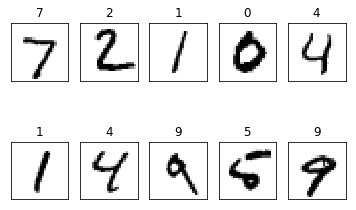

In [13]:
fig = plt.figure()
for i in range(10):
 subplot = fig.add_subplot(2,5, i+1)

 # 이미지 깨끗하게 출력, x,y의 눈금 출력 안함.
 subplot.set_xticks([])
 subplot.set_yticks([])

 subplot.set_title('{}'.format(np.argmax(labels[i])))
 subplot.imshow(mnist.test.images[i].reshape((28,28)),
 cmap=plt.cm.gray_r)
plt.show()

###더 알아보기
- 과적합을 막아주는 기법으로 가장 유명한 것이 쉽게 이해 가능한 것은 드롭아웃이다.
-  최근에는 배치 정규화(Batch Normalization)라는 기법이 많이 이용됨.
   - 과적합을 막고, 학습 속도도 향상시켜주는 장점이 있다.
   - 등장 배경은 학습 시 발산이나 소실 등을 방지하여 학습 속도를 높이기 위한 방법이다.
   - tf.nn.batch_normalization과 tf.layers.batch_normalization 함수로 쉽게 적용 가능.